In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#datos de altura y pesos
datos = [[1.79,74],
[1.61,55],
[1.8,72],
[1.82,84],
[1.61,56],
[1.74,67],
[1.75,65],
[1.8,80],
[1.67,76.4],
[1.6,60],
[1.82,90],
[1.74,68.5],
[1.67,78.1],
[1.63,59],
[1.78,63],
[1.56,60],
[1.63,89],
[1.83,95],
[1.66,66],
[1.83,67],
[1.6,69],
[1.62,57],
[1.75,70],
[1.75,75],
[1.9,100],
[1.72,60],
[1.7,75],
[1.55,45],
[1.5,75],
[1.75,80],
[1.81,80],
[1.8,73],
[1.65,67],
[1.73,55],
[1.8,90],
[1.56,58],
[1.5,60],
[1.7,50],
[1.9,95],
[1.7,70],
[1.28,56],
[1.65,63],
[1.74,65],
[1.92,60],
[1.95,90],]



In [4]:
X = np.array(datos, dtype = float)
print(X)

[[  1.79  74.  ]
 [  1.61  55.  ]
 [  1.8   72.  ]
 [  1.82  84.  ]
 [  1.61  56.  ]
 [  1.74  67.  ]
 [  1.75  65.  ]
 [  1.8   80.  ]
 [  1.67  76.4 ]
 [  1.6   60.  ]
 [  1.82  90.  ]
 [  1.74  68.5 ]
 [  1.67  78.1 ]
 [  1.63  59.  ]
 [  1.78  63.  ]
 [  1.56  60.  ]
 [  1.63  89.  ]
 [  1.83  95.  ]
 [  1.66  66.  ]
 [  1.83  67.  ]
 [  1.6   69.  ]
 [  1.62  57.  ]
 [  1.75  70.  ]
 [  1.75  75.  ]
 [  1.9  100.  ]
 [  1.72  60.  ]
 [  1.7   75.  ]
 [  1.55  45.  ]
 [  1.5   75.  ]
 [  1.75  80.  ]
 [  1.81  80.  ]
 [  1.8   73.  ]
 [  1.65  67.  ]
 [  1.73  55.  ]
 [  1.8   90.  ]
 [  1.56  58.  ]
 [  1.5   60.  ]
 [  1.7   50.  ]
 [  1.9   95.  ]
 [  1.7   70.  ]
 [  1.28  56.  ]
 [  1.65  63.  ]
 [  1.74  65.  ]
 [  1.92  60.  ]
 [  1.95  90.  ]]


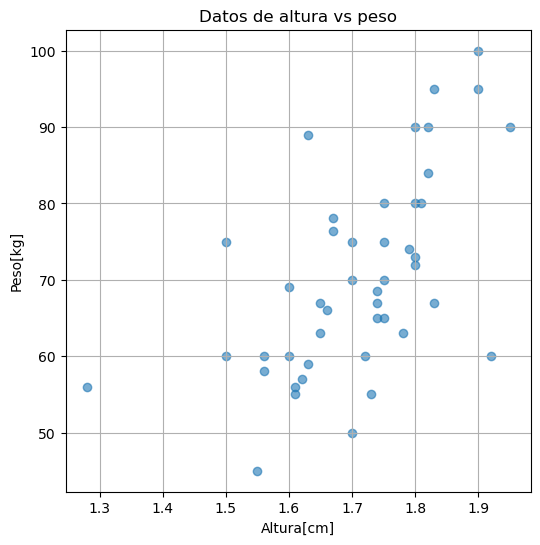

In [5]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1], alpha=0.6)
plt.xlabel("Altura[cm]")
plt.ylabel("Peso[kg]")
plt.title("Datos de altura vs peso")
plt.grid()
plt.show()


Coef de Perason:

    r = cov(x,y) / dev_std(x) * des_std(y)

* Entre dos o mas var hay una relacion directa, la covarianza da un valor > 0
* Cuando entre las dos variables hay una relacion inversa, covarianza da un valor < 0
* Cuando no hay relacion entre las variables, la covarianza da un valor ≈ 0

Observaciones:
* Es un coef, no tiene unidade.
* -1 <= r <= 1
    - Si r ≈ 1 -> correlacion directa fuerte -> los puntos se agrupan formando una recta
    - Si r ≈ -1 -> correlacion inversa fuerta -> los puntos se agrupan formando una recta decreciente
    - r = -1 o r = 1, hay una correlacion funcional -> existe una funcion lineal que me da esos puntos.
    - r ≈ 0, no existe una correlacion lineal. Puede ser de otro tipo. 


[[1.        0.5868901]
 [0.5868901 1.       ]]


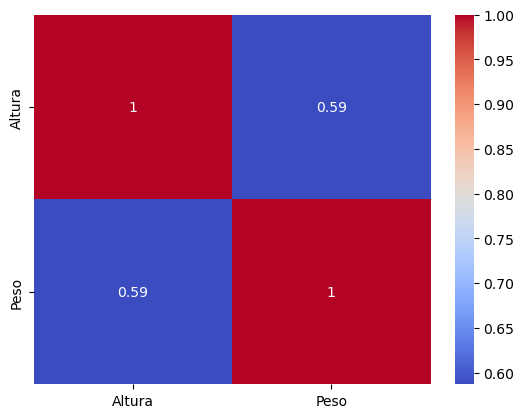

In [6]:
corr = np.corrcoef(X.T)
print(corr)

sns.heatmap(corr, annot=True, cmap="coolwarm", xticklabels=["Altura","Peso"], yticklabels=["Altura","Peso"])
plt.show()

Dado que el coeficiente de correlacion de Pearson es ≈ 0.6, podemos decir que hay un correlacion positiva moderada entre 'altura' y 'peso'.
Cuando la altura aumenta, el peso tiende a aumentar. 

Pero la relacion no es lineal, ya que hay personas altas que pesan "poco" y personas bajas que pesan "mucho"


* Varianza: 
Indica cuanto se alejan los datos de un conjunto  de su valor medio. Es decir que tan dispersos estan los datos del conjunto. 

    * Formula : [ Suma(x_i - x_m)^2 ]/ N
    - x_i : dato
    - x_m : media
    - N : cantidad total de datos.

* El desvio estandar: 
es la raiz de la varianza, y nos da una medida de dispersion  en las mismas unidades que los datos originales.
    * Desv_std = (varianza)^1/2

Lo que sucede, es que cuando calculamos la varianza para ver el grado de dispersion de los datos, al hacer las cuentas, estamos elevando al cuadrado el valor de los. Por lo tanto la medicion que en unidades cuadradas u^2. 

Al calcular el desvio estandar, que es la raiz cuadrada de la varianza, volvemos a la unidad de medida original de los datos.



**Estandarizacion de las variables** 

Se debe estandarizar las variables antes de aplicar PCA porque este algortimo se basa en la matriz de covarianza de los datos. 

A su ve vez la varianza de los datos, dependen de la escala de cada variable, ya que al calcular la varianza, los valores se elevan al cuadrado y la unidad de medida de la variabla cambia.

Esto afecta de forma directa al algortimo PCA, porque este busca las direcciones  donde los datos tienen mayor varianza.
Y si hay datos en escalas diferentes, la vairable con mayor escala numerica domina el calculo. Las direcciones principales se orientaran hacia la variable con mayor magnitud, dando un resultado sesgado. 

#En sintesis: la estandarizacion asigna un peso igual a cada variable en el analisis de los datos ya que todas las variables tendran la misma varianza (1) y media (0). Esto asegura que la variabilidad de una variable no domine el artifialmente el resultado por el hecho de tener una escala numerica mas grande, y de esta forma PCA se enfoca en las relaciones entre las variables.





**Calculo de matriz de covarianza**

Medias:
[ 1.70822222 70.28888889]

Matriz de covarianza:
[[1.61831313e-02 9.68820707e-01]
 [9.68820707e-01 1.68387828e+02]]



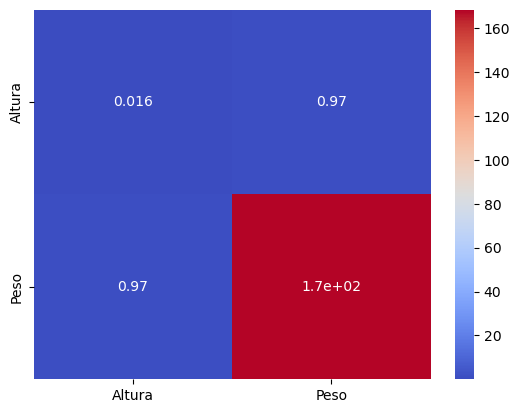

In [ ]:

medias = X.mean(axis= 0) #promedio a lo largo de la fila -> resultado : promedio de cada columna.
Xc = X - medias
print(f"Medias:\n{medias}\n")


cov_matriz = np.cov(Xc, rowvar=False, bias=False)
print(f"Matriz de covarianza:\n{cov_matriz}\n")

sns.heatmap(cov_matriz, annot=True, cmap="coolwarm", xticklabels=["Altura","Peso"], yticklabels=["Altura","Peso"])
plt.show()


**Observaciones**
* Podemos ver que la varianza de la altura es muy bajo, es decir que hay poca dispersion. 
* En cambio la varianza del peso tiene un valor alto, lo que implica que hay dispersion de los datos del peso.
* Por otro lado la covarianza entre la altura y el peso es positivo y alto ≈ 1 -> Las variables se mueven juntas en la misma direccion.

**Calculo de los valores y vectores propios**
* Valores propios : Det (Cov_matriz - λI) = 0
* Vectores propios : Cov_matriz - λI = 0 (vector nulo)
* Ecuacion caracteristica: λ² - (a+d)λ + (ad - bc) = 0

In [8]:
a = cov_matriz[0,0]
b = cov_matriz[0,1]
c = cov_matriz[1,0]
d = cov_matriz[1,1]

coeficientes = [1, -(a+d), ((a*d)-(b*c))]
print(f"Coeficientes ec caracteristica:\n {coeficientes}\n")

lambdas = np.roots(coeficientes)
print(f"Valores propios resolviendo ec caracteristica:\n {lambdas}\n")

valores_propios, vectores_propios = np.linalg.eig(cov_matriz) #vectores columna
print(f"Valores propios con np:\n {valores_propios}\n")
print(f"Vectores (columna) propios con np:\n {vectores_propios}") 

Coeficientes ec caracteristica:
 [1, -168.40401141414145, 1.7864287741850324]

Valores propios resolviendo ec caracteristica:
 [1.68393403e+02 1.06086625e-02]

Valores propios con np:
 [1.06086625e-02 1.68393403e+02]

Vectores (columna) propios con np:
 [[-0.99998345 -0.00575378]
 [ 0.00575378 -0.99998345]]


**Verificar ΣV = **λ**V**

In [9]:
for i in range(len(valores_propios)):
    v = vectores_propios[:,i] #tomo la columna i
    lhs = cov_matriz @ v #produco de matrices
    rhs = valores_propios[i] * v  #escalar por un vector
    print(f"\nΣλ{i+1}: ΣV = λV")
    print(f"ΣV = {lhs}")
    print(f"λV = {rhs}")



Σλ1: ΣV = λV
ΣV = [-1.06084869e-02  6.10398591e-05]
λV = [-1.06084869e-02  6.10398591e-05]

Σλ2: ΣV = λV
ΣV = [  -0.96889778 -168.39061532]
λV = [  -0.96889778 -168.39061532]


**Ordenar los Vectores Propios** 

Se ordenan en base a los valores propios en forma descendente

In [10]:
#obtengo los indices que ordendan los valores propios de forma desc
# np.argsort(valores_propios) devuelve los indeices de mayor a menor
#[::-1]: revierte el arreglo de indices para obtenerlos de forma desc.
indexs = np.argsort(valores_propios)[::-1]
print(f"Indices ordenados de valores propios:\n {indexs}\n")

valores_propios_ordenados = valores_propios[indexs]

vectores_propios_ordenados = vectores_propios[:,indexs]
print(f"vectores propios:\n {vectores_propios}\n")

print(f"vectores propios ord:\n {vectores_propios_ordenados}")

Indices ordenados de valores propios:
 [1 0]

vectores propios:
 [[-0.99998345 -0.00575378]
 [ 0.00575378 -0.99998345]]

vectores propios ord:
 [[-0.00575378 -0.99998345]
 [-0.99998345  0.00575378]]


**Proyectar datos en las direciones principales**

In [11]:
Xpca = Xc @ vectores_propios_ordenados
print(f"Matriz de  proyeccion:\n{Xpca}")

Matriz de  proyeccion:
[[-3.71152021e+00 -6.04235250e-02]
 [ 1.52892010e+01  1.02517667e-02]
 [-1.71161086e+00 -8.19309099e-02]
 [-1.37115273e+01 -3.28852765e-02]
 [ 1.42892175e+01  1.60055419e-02]
 [ 3.28865161e+00 -5.07007791e-02]
 [ 5.28856096e+00 -7.22081639e-02]
 [-9.71147843e+00 -3.59007083e-02]
 [-6.11079003e+00  7.33835491e-02]
 [ 1.02893413e+01  4.90204771e-02]
 [-1.97114280e+01  1.63737472e-03]
 [ 1.78867644e+00 -4.20701163e-02]
 [-7.81076189e+00  8.31649669e-02]
 [ 1.12891521e+01  1.32671985e-02]
 [ 7.28835524e+00 -1.13715218e-01]
 [ 1.02895714e+01  8.90198150e-02]
 [-1.87103513e+01  1.85880454e-01]
 [-2.47114027e+01  2.04064162e-02]
 [ 4.28909535e+00  2.35441215e-02]
 [ 3.28813377e+00 -1.40699289e-01]
 [ 1.28949024e+00  1.00804454e-01]
 [ 1.32891765e+01  1.17594826e-02]
 [ 2.88643727e-01 -4.34392879e-02]
 [-4.71127351e+00 -1.46704120e-02]
 [-2.97117227e+01 -2.08235491e-02]
 [ 1.02886508e+01 -7.09775365e-02]
 [-4.71098582e+00  3.53287604e-02]
 [ 2.52893807e+01  1.27130215e-0

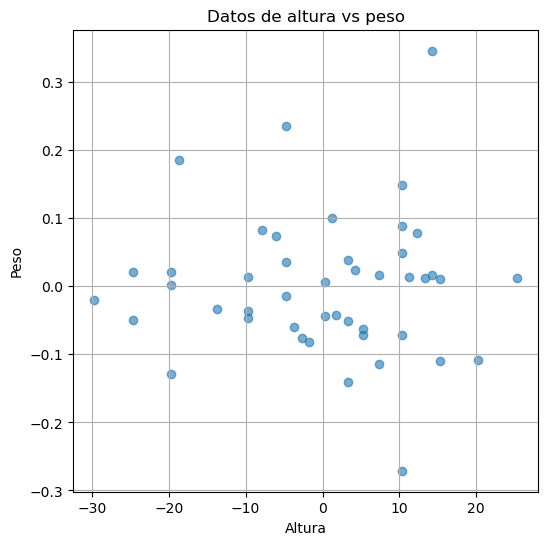

In [12]:
plt.figure(figsize=(6,6))
plt.scatter(Xpca[:,0],Xpca[:,1], alpha=0.6)
plt.xlabel("Altura")
plt.ylabel("Peso")
plt.title("Datos de altura vs peso")
plt.grid()
plt.show()

**¿Qué representa un valor propio grande en el contexto de PCA?** 
Valor propio -> indica la variabilidad de los datos en la componente asociada.

Un valor propio grande indica que la componente principal asociada explica una gran proporcion de la varianza de los datos.
Cuando mas grande es el valor_p, "mas informacion"(variabilidad) contiene la componente asociada.

**Relacion entre autovectores y direccion de maxima varianza**

Los vectores propios indican la direccion de las componentes principales en el espacio de las variables originales. 

El vector propio asociado al valor propio mas grande indica la direccion en la que los datos tienen maxima varianza. 

Los vectores propios restantes tienen la direccion donde se explica el resto de la varianza que no esta contemplada en la direccion principal.


**Dado un conjunto de datos con “n” variables, ¿cuántos componentes principales como máximo puede tener PCA?**

Si tenemos un set de datos con n variables, al calcular la matriz de covarianza tendremos una matriz de orden n.

Para cualquier matriz cuadrada de orden n, al plantear la ec caracteristicas tendremos un polinomio de grado n. Y un polinomio de grado n, tiene exactamente n raices.

En el caso de la matriz de covarianza sus valores propios λ pertenecen al conjunto de los reales positivos R >= 0

Entonces tendremos como maximo n vectores propios y por ende n componentes principales.

Pero en la practica nos quedaremos con un numero k < n de componentes principales, y seran aquellas que expliquen un porcentaje suficientemente alto de varianza total (Por ej un 95%).






**Varianza explicada**

Indica la cantidad de variabilidad de los datos originales en cada componente principal. 
Esta corresponde al valor propio asociado a esa componente. 

* Varianza eplicada de PCi = λi

**Proporcion de varianza explicada**

Es la parte de varianza total que explica cada componente.
* Proporcion de var exp de PCi = λi / Suma (λi)

In [13]:
varianza_explicada = valores_propios_ordenados / valores_propios_ordenados.sum()
print(f"Varianza PC1: {varianza_explicada[0]:.5f} - Porcentual: {(varianza_explicada[0]*100):.5f} %")
print(f"Varianza PC2: {varianza_explicada[1]:.5f} - Porcentual: {(varianza_explicada[1]*100):.5f} %")

Varianza PC1: 0.99994 - Porcentual: 99.99370 %
Varianza PC2: 0.00006 - Porcentual: 0.00630 %


**¿Cuáles y cuántos componentes principales seleccionaría parala obtención de la matriz proyección (nueva matriz de datos)?**

* Ya que la primera componente principal (CP1) explica el 99% de variacion total de los datos (varianza), es suficiente con eligiria para la obtencion de la nueva matriz de proyeccion. 

* Por lo tanto, se selecciona 1 CP (CP1), ya que contiene toda la informacion relevante de los datos, mientras que la CP2 aporta solo un 0.006% de informacion, lo cual es despreciable.

In [14]:
Xpca_1 = Xc @ vectores_propios_ordenados[0]
print(f"Matriz de  proyeccion (CP1):\n{Xpca_1}")

Matriz de  proyeccion (CP1):
[ -3.71152021  15.28920096  -1.71161086 -13.71152729  14.28921751
   3.28865161   5.28856096  -9.71147843  -6.11079003  10.28934126
 -19.71142798   1.78867644  -7.81076189  11.2891521    7.28835524
  10.28957141 -18.71035131 -24.71140275   4.28909535   3.28813377
   1.28949024  13.28917653   0.28864373  -4.71127351 -29.71172275
  10.28865081  -4.71098582  25.28938065  -4.70983506  -9.71119074
  -9.71153597  -2.7115943    3.28916945  15.28851051 -19.7113129
  12.28953831  10.28991664  20.28860035 -24.71180551   0.28893142
  14.29111626   7.28910323   5.2886185   10.28750005 -19.71217597]


**En un conjunto de dos variables altamente correlacionadas, ¿Esperaría que la primera componente principal explique la mayor parte de la varianza? Explicar.**


Si, ya que precisamente luego de aplicar PCA, la primera CP contiene y explica la mayor parte de la varianza de los datos. 

En el caso de variables altamente relacionadas, el conjunto de datos (puntos) se agrupan formando un recta en alguna direccion. Esa direccion, es la direccion de varianza maxima, que es lo que captura PC1.

la otra direccion (perpendicular) a PC1, contiene muy poca variabilidad, la que es explicada por PC2.